### Q. Create a logistic Decision Tree on the basis of 'Gender', 'Height', and 'Class' of the given dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Gender.csv')
df

,Person,Gender,Height,Class
0,1,0,1.60,S
1,2,1,2.00,M
2,3,0,1.90,M
3,4,0,1.88,M
4,5,0,1.70,S
5,6,1,1.85,M
6,7,0,1.60,S
7,8,1,1.70,S
8,9,1,2.20,T
9,10,1,2.10,T


In [3]:
df.columns

Index(['Person', 'Gender', 'Height', 'Class'], dtype='object')

In [4]:
df['Height']=df['Height'].round(1)

In [5]:
df.drop(['Person'],axis=1,inplace=True)

In [6]:
df['Height'].nunique()

7

In [7]:
df['Height'].value_counts()

1.9    4
1.8    4
1.6    2
1.7    2
2.0    1
2.2    1
2.1    1
Name: Height, dtype: int64

In [8]:
df.Height.replace({1.9:1,1.8:2,1.6:3,1.7:4,2.0:5,2.2:6,2.1:7},inplace=True)

In [9]:
df.dtypes

Gender      int64
Height    float64
Class      object
dtype: object

In [10]:
df.shape

(15, 3)

In [11]:
df.head()

,Gender,Height,Class
0,0,3.0,S
1,1,5.0,M
2,0,1.0,M
3,0,1.0,M
4,0,4.0,S


In [12]:
df.tail()

,Gender,Height,Class
10,0,2.0,M
11,1,1.0,M
12,0,1.0,M
13,0,2.0,M
14,0,2.0,S


In [13]:
df.describe()

,Gender,Height
count,15.000000,15.000000
mean,0.400000,2.933333
std,0.507093,1.907379
min,0.000000,1.000000
25%,0.000000,1.500000
50%,0.000000,2.000000
75%,1.000000,4.000000
max,1.000000,7.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  15 non-null     int64  
 1   Height  15 non-null     float64
 2   Class   15 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 488.0+ bytes


In [15]:
x= df[['Gender','Height']].values

In [16]:
y= df['Class']

In [17]:
y.value_counts()

M    8
S    5
T    2
Name: Class, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
model = DecisionTreeClassifier()

In [22]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
y_predict = model.predict(x_test)

In [24]:
y_predict

array(['S', 'M', 'S', 'T', 'M'], dtype=object)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test,y_predict)*100

80.0

In [27]:
df1 = pd.DataFrame({'actual':y_test,'predicted':y_predict})

In [28]:
df1

,actual,predicted
1,M,S
11,M,M
7,S,S
8,T,T
2,M,M


In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
performance= confusion_matrix(y_test,y_predict)

In [31]:
performance

array([[2, 1, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int64)

In [32]:
from sklearn.metrics import plot_confusion_matrix

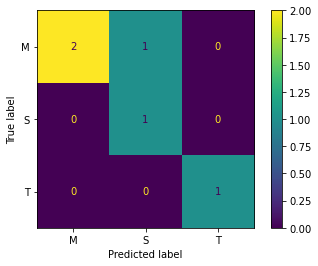

In [33]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [34]:
cross_df= pd.crosstab(df1['actual'],df1['predicted'], rownames=['Actual'], colnames=['Predicted'])

In [35]:
cross_df

Predicted,M,S,T
Actual,,,
M,2,1,0
S,0,1,0
T,0,0,1


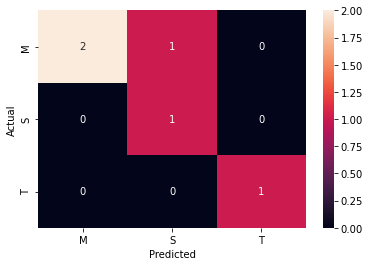

In [36]:
sns.heatmap(cross_df, annot=True)
plt.show()

In [37]:
from sklearn import tree

In [38]:
feature_name= ['Gender','Height']

In [39]:
feature_name

['Gender', 'Height']

In [40]:
type(feature_name)

list

In [41]:
class_name= ['M','T','S']

In [42]:
class_name

['M', 'T', 'S']

In [43]:
type(class_name)

list

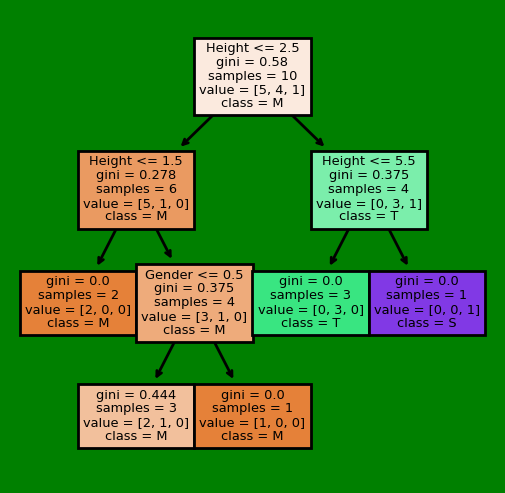

In [44]:
fig,ax= plt.subplots(nrows=1, ncols=1, figsize=(3,3), dpi=200, facecolor='g')
tree.plot_tree(model,feature_names=feature_name, class_names=class_name, filled=True)
plt.show()